In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
# 合計を求めるsumの動きを確認しましょう。
#行方向に計算が進むので、列の合計が見られます。
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#行の合計を求めたいときは、列方向（axis=1）で計算
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [5]:
# 最小値を求める。  axis=0　なので行方向、つまり列の最小値が得られる
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [6]:
# 最小値を保持しているindexを調べられます。
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [28]:
# maxでも同じことができます。
dframe1.max(axis=1)

A    2.0
B    4.0
dtype: float64

In [30]:
dframe1.max()
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [8]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [27]:
# 累積を求めることができます。 行方向に累積
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [10]:
# DataFrameの全体像を簡単に見ることができます。
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [11]:
# 共分散（covariance）と相関（correlation）
# 英語ですが、次の動画が参考になります。

In [1]:
"""
from IPython.display import YouTubeVideo
# 共分散の説明（英語）
YouTubeVideo('xGbpuFNR1ME')
"""

"\nfrom IPython.display import YouTubeVideo\n# 共分散の説明（英語）\nYouTubeVideo('xGbpuFNR1ME')\n"

In [2]:
"""
# 相関の説明（英語）
YouTubeVideo('4EXNedimDMs')
"""

"\n# 相関の説明（英語）\nYouTubeVideo('4EXNedimDMs')\n"

In [2]:
# 株価のデータを使って、共分散と相関をみていきましょう。
# PandasはWebからデータをとってくることも可能です。
#Yahooではなぜか読み込めない。Googleを使う。
#　pandas.ioからpandas_datareaderモジュールに変わった。
import pandas_datareader.data as pdr
# 日付を扱うために、datetimeをimportします。
import datetime
# 米国のGogleのサービスを使って、株価を取得します。
# すべて石油関連会社
# CVX シェブロン、XOM エクソンモービル、BP 英BP
prices = pdr.DataReader(['CVX','XOM','BP'], 'google',  
                                            start=datetime.datetime(2010, 1, 1), 
                                           end=datetime.datetime(2013, 1, 1))['Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,59.15,79.06,69.15
2010-01-05,59.57,79.62,69.42
2010-01-06,59.88,79.63,70.02
2010-01-07,59.86,79.33,69.80
2010-01-08,60.00,79.47,69.52


In [5]:
# 出来高（何株売買されたか）のデータも取れます
volume = pdr.DataReader(['CVX','XOM','BP'],'google', 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956568.0,10174309.0,27811317.0
2010-01-05,4109563.0,10596029.0,30178588.0
2010-01-06,6230175.0,11014848.0,35047453.0
2010-01-07,4432171.0,9627919.0,27194133.0
2010-01-08,3786118.0,5625080.0,24899483.0


In [6]:
# 変化の割合を計算できます。  (今回値　- 前回値)　/ 前回値
rets = prices.pct_change()

In [7]:
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,0.007083,0.003905
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004011


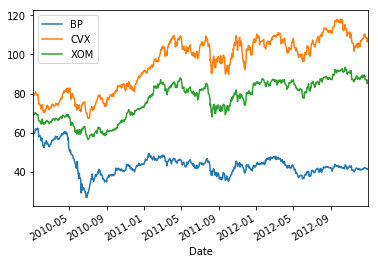

In [8]:
# まず、単純な株価の変化を描画してみます。
%matplotlib inline
prices.plot()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# 予想通りの相関が見られます。
sns.heatmap(rets.corr())
# seabornについては、後ほど詳しく学習します。

NameError: name 'rets' is not defined

In [20]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [21]:
#  重複するデータをまとめられます。
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [22]:
# それぞれのデータがいくつあるかもわかります。
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
dtype: int64

In [3]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)

f = web.DataReader("F", 'google', start, end)
f

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855796
2010-01-05,10.45,11.24,10.40,10.96,215620138
2010-01-06,11.21,11.46,11.13,11.37,200070554
2010-01-07,11.46,11.69,11.32,11.66,130201626
2010-01-08,11.67,11.74,11.46,11.69,130462912
2010-01-11,11.90,12.14,11.78,12.11,170626174
2010-01-12,11.98,12.03,11.72,11.87,162995898
2010-01-13,11.91,11.93,11.47,11.68,154527028
2010-01-14,11.65,11.86,11.51,11.76,116572673
